# Visualização inicial dos dados de filmes da base The Movie Database
---

Visualização inicial dos dados do app Letterboxd a partir dos arquivos .csv na camada bronze (RAW). O objetivo principal é compreender o estado e o universo do dataset em análise, para isso, serão explorados os seguintes pontos:

1. Visualização de NaN, Null e campos vazios
2. Visualização de outliers
3. Entendimento das dimensões, valores máximos, mínimos, médias e medianas
4. Correlação entre os campos numéricos e entendimento da distribuição

Para isso será usada a biblioteca python de visualização de dados seaborn. Devido ao foco do notebook ser visualização dos dados na camada bronze, e a utilização da biblioteca seaborn que traz como requisito possuir os dados agregados em memória, será utilizado o python pandas para essa etapa.

## Leitura dos arquivos na camada Bronze

### Import das bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas configs
pd.set_option('display.max_colwidth', None)

### Ingestão do csv no pandas

In [3]:

# Leitura do csv para dataframe e informações básicas
df = pd.read_csv("./TMDB_movie_dataset_v11.csv",
                    sep=",", 
                    encoding="utf-8",
                    index_col=False,
                    na_values=["N/A", "?", "null", "NULL"],
                    parse_dates=["release_date"]

                )


In [4]:
# print(df.info())
# print(len(df))
# print(df["status"][df["status"] != "Released"])
# print(df["genres"].unique())
# print(df["production_countries"].unique())
# print(df["production_companies"].unique())
# print(df["spoken_languages"].unique())
# print(df["keywords"].unique())


### Análise exploratória

Após a leitura do csv de origem dos dados, e ingestão para a dataframe do pandas, serão gerados abaixo diversas visualizações para os dados, com a finalidade de possibilitar uma análise exploratória que será a base para o tratamento dos dados na transferência para a camada silver.

A biblioteca utilizada foi o seaborn, e algumas das visualizações escolhidas foram:

- Barplot
- Regplot
- Histograma
- lineplot
- countplot
- scatterplot

#### Visualização de campos vazios, NaN ou Null

Campos vazios, nulos ou NaN por coluna no dataset de filmes.

/tmp/ipykernel_821385/1988179427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulls.values, y=nulls.index, palette='viridis')


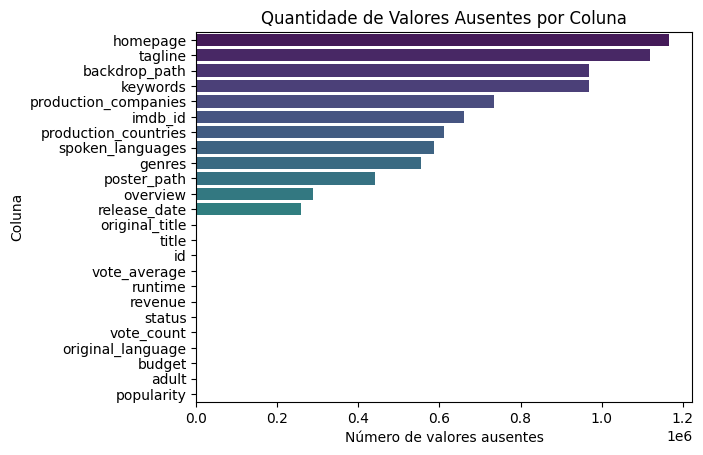

In [6]:
nulls = df.isnull().sum().sort_values(ascending=False)
sns.barplot(x=nulls.values, y=nulls.index, palette='viridis')
plt.title('Quantidade de Valores Ausentes por Coluna')
plt.xlabel('Número de valores ausentes')
plt.ylabel('Coluna')
plt.show()


#### Verificação de dados duplicados nas colunas

Contagem de dados duplicados por coluna. Importante ressaltar que dados duplicados em uma coluna não necessáriamente são um problema. 

No caso do dataset do TMDB, o campo `id` de filme é único e usado como chave primária, e não pode se repetir, porém vários filmes podem ter o mesmo idioma original por exemplo, justificando uma repetição na coluna. 

/tmp/ipykernel_28909/2660276118.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duplicated_count', y='col', data=dup_df, palette='viridis')


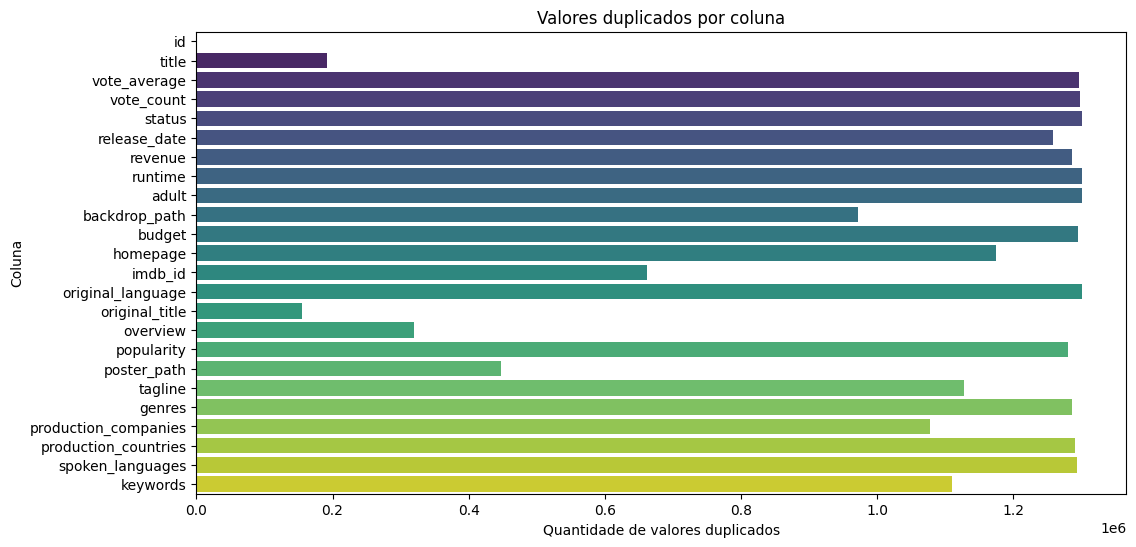

In [7]:
duplicated_counts = df.apply(lambda col: col.duplicated().sum())

dup_df = duplicated_counts.reset_index()
dup_df.columns = ['col', 'duplicated_count']

plt.figure(figsize=(12,6))
sns.barplot(x='duplicated_count', y='col', data=dup_df, palette='viridis')
plt.xlabel("Quantidade de valores duplicados")
plt.ylabel("Coluna")
plt.title("Valores duplicados por coluna")
plt.show()

#### Distribuição geral de notas de avaliação

Visualização de notas de filmes (min: 0 e max: 10) no eixo x, pela quantidade de avaliações no eixo y. 

Text(0.5, 1.0, 'Distribuição das notas de avaliação')

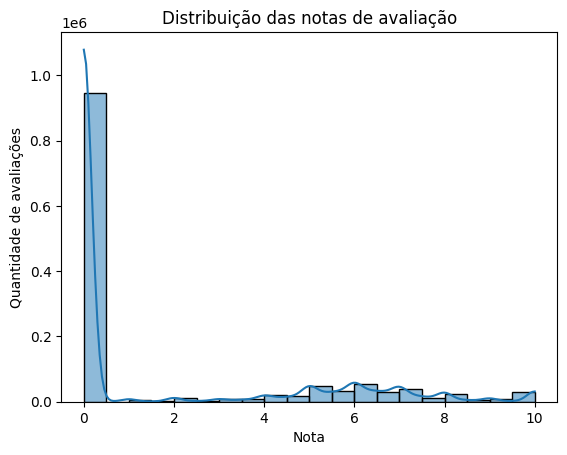

In [ ]:
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.xlabel("Nota")
plt.ylabel("Quantidade de avaliações")
plt.title("Distribuição das notas de avaliação")

#### Relação entre popularidade do filme e nota de avaliação

Regressão linear de popularidade por nota de avaliação dos filmes. É possível identificar outliers com avaliações baixas e popularidade muito alta.

Text(0, 0.5, 'Média de avaliação')

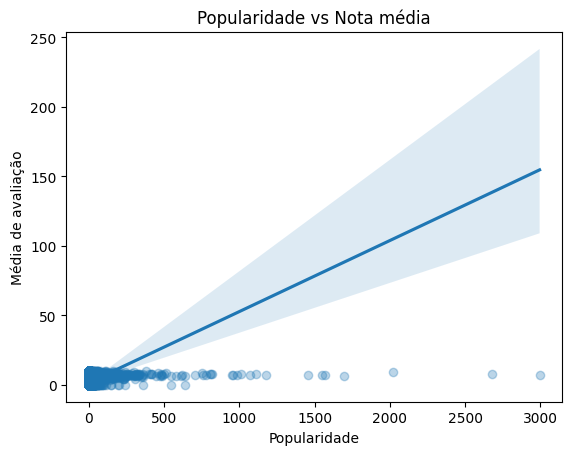

In [ ]:
sns.regplot(data=df, x="popularity", y="vote_average", order=1, scatter_kws={"alpha": 0.3})
plt.title("Popularidade vs Nota média")
plt.xlabel("Popularidade")
plt.ylabel("Média de avaliação")


#### Quantidade de filmes classificados como "Adulto"

Entendimento da quantidade de filmes adultos no dataset, para serem removidos no tratamento de dados para a camada silver.

/tmp/ipykernel_23643/2142783712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="adult_label", palette="Set2")


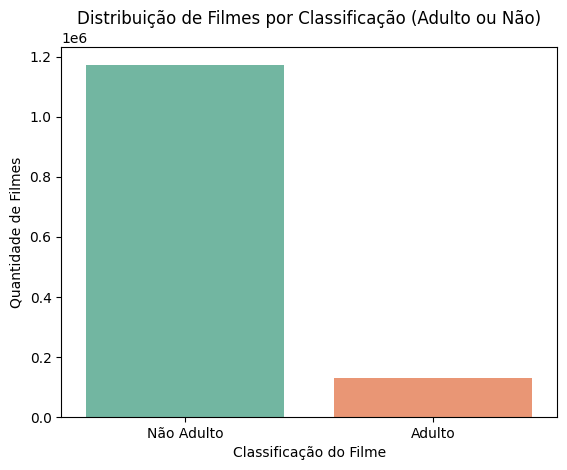

In [ ]:
df["adult_label"] = df["adult"].map({True: "Adulto", False: "Não Adulto"})

sns.color_palette("mako", as_cmap=True)
sns.countplot(data=df, x="adult_label", palette="Set2")

plt.xlabel("Classificação do Filme")
plt.ylabel("Quantidade de Filmes")
plt.title("Distribuição de Filmes por Classificação (Adulto ou Não)")
plt.show()



#### Relação entre orçamento de filmes e receita Scatterplot

Correlação entre a orçamento dedicado ao filme e a receita arrecadada, visualizada em um scatterplot para entendimento da distribuição.

Text(0.5, 1.0, 'Relação entre orçamento e receita (escala log)')

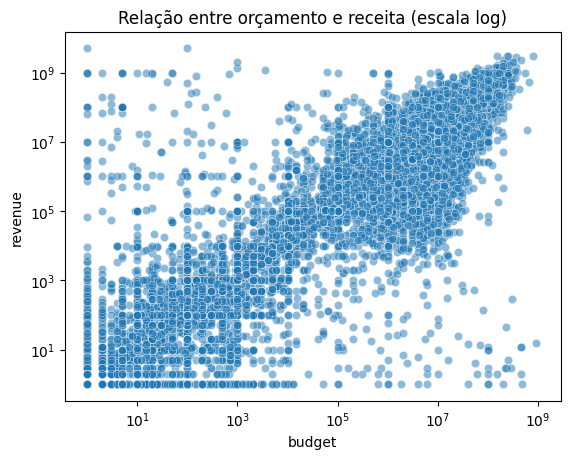

In [ ]:
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.xscale('log'); plt.yscale('log')
plt.title("Relação entre orçamento e receita (escala log)")


#### Relação entre orçamento de filmes e receita com Regressão Linear

Correlação entre a orçamento dedicado ao filme e a receita arrecadada, visualizada em um gráfico de regressão linear para melhor entendimento dos outliers.

In [ ]:
sns.regplot(data=df, x="budget", y="revenue", order=1, scatter_kws={"alpha": 0.3})

plt.title("Relação entre orçamento e receita")
plt.xlabel("Orçamento (budget)")
plt.ylabel("Receita (revenue)")
plt.show()

#### Distribuição dos idiomas mais comuns

Visualização dos 10 idiomas mais comuns em filmes

Text(0.5, 1.0, 'Top 10 idiomas mais comuns')

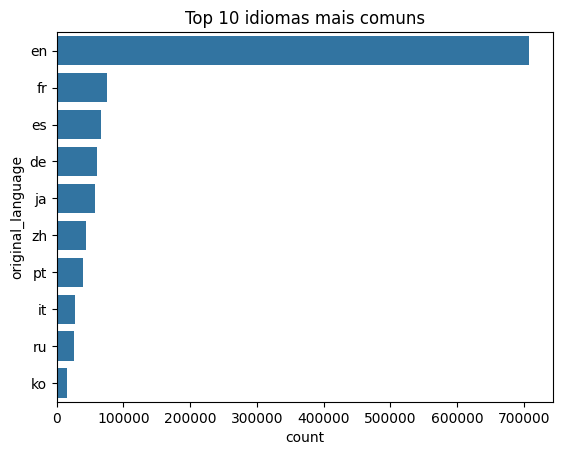

In [ ]:
sns.countplot(y='original_language', data=df, order=df['original_language'].value_counts().index[:10])
plt.title("Top 10 idiomas mais comuns")


#### Distribuição de filmes pelo ano de lançamento

Entendimento dos filmes por ano de lançamento

0          2010.0
1          2014.0
2          2008.0
3          2009.0
4          2012.0
            ...  
1301235    1923.0
1301236    2021.0
1301237    1988.0
1301238    2020.0
1301239       NaN
Name: release_year, Length: 1301240, dtype: float64


Text(0.5, 1.0, 'Número de filmes lançados por ano')

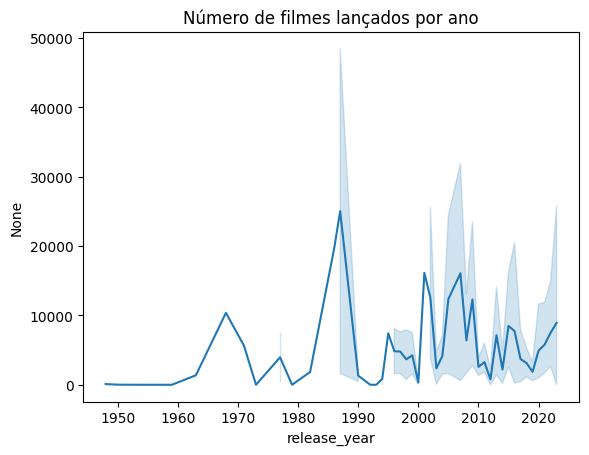

In [ ]:
df["release_year"] = df["release_date"].dt.year
# print(df["release_year"])
sns.lineplot(data=df, x='release_year', y=df.groupby('release_year').size())
plt.title("Número de filmes lançados por ano")


#### Distribuição de receita arrecadada pela nota do filme

/tmp/ipykernel_7770/2179392640.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='vote_average', y='revenue', palette='coolwarm')


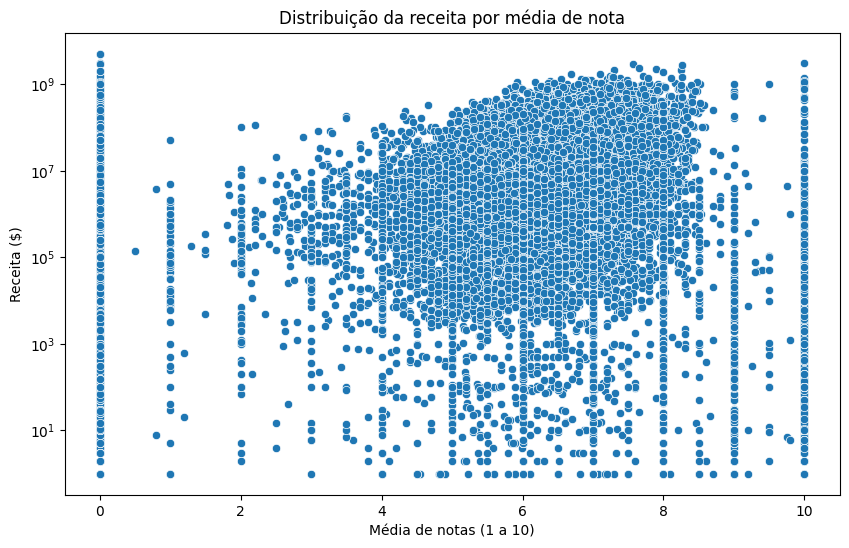

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='vote_average', y='revenue', palette='coolwarm')
plt.xlabel("Média de notas (1 a 10)")
plt.ylabel("Receita ($)")
plt.title("Distribuição da receita por média de nota")
plt.xscale('linear')
plt.yscale('log') 
plt.show()
